In [4]:
!pip install gradio

In [19]:


import gradio as gr

url = 'https://hf.space/embed/OFA-Sys/OFA-Image_Caption/file/beatles.jpeg'

# To convert your image file into the base64 format required by the API
bs4url = gr.processing_utils.encode_url_or_file_to_base64(url)

In [20]:
import requests
r = requests.post(url='https://hf.space/embed/OFA-Sys/OFA-Image_Caption/+/api/predict/', json={"data": [bs4url]})
r.json()

{'data': ['a lunch box with a sandwich and fruit on a wooden table'],
 'flag_index': None,
 'updated_state': None,
 'durations': [4.2350380420684814],
 'avg_durations': [11.374823138882887]}

In [22]:
!git clone --single-branch --branch feature/add_transformers https://github.com/OFA-Sys/OFA.git
!pip install OFA/transformers/
!git clone https://huggingface.co/OFA-Sys/OFA-base


Cloning into 'OFA'...
remote: Enumerating objects: 5605, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 5605 (delta 8), reused 23 (delta 6), pack-reused 5578
Receiving objects: 100% (5605/5605), 97.90 MiB | 10.53 MiB/s, done.
Resolving deltas: 100% (2023/2023), done.
Processing ./OFA/transformers
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for transformers: filename=transformers-4.18.0.dev0-py3-none-any.whl size=3890555 sha256=74a1940

In [43]:
!git clone https://huggingface.co/OFA-Sys/OFA-large

Cloning into 'OFA-large'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 31 (delta 13), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (31/31), 538.42 KiB | 775.00 KiB/s, done.


In [45]:
from food.tools import *

In [68]:
ckpt_dir = 'OFA-large'

In [111]:
from PIL import Image
from torchvision import transforms
from transformers import OFATokenizer, OFAForConditionalGeneration

mean, std = [0.5, 0.5, 0.5], [0.5, 0.5, 0.5]
resolution = 512
patch_resize_transform = transforms.Compose([
        lambda image: image.convert("RGB"),
        transforms.Resize((resolution, resolution), interpolation=Image.BICUBIC),
        transforms.ToTensor(), 
        transforms.Normalize(mean=mean, std=std)
    ])

model = OFAForConditionalGeneration.from_pretrained(ckpt_dir)
tokenizer = OFATokenizer.from_pretrained(ckpt_dir)


/tmp/ipykernel_945484/910557115.py:9: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  transforms.Resize((resolution, resolution), interpolation=Image.BICUBIC),


In [144]:
url = 'https://image.shutterstock.com/image-photo/healhty-vegan-lunch-bowl-avocado-600w-753381028.jpg'

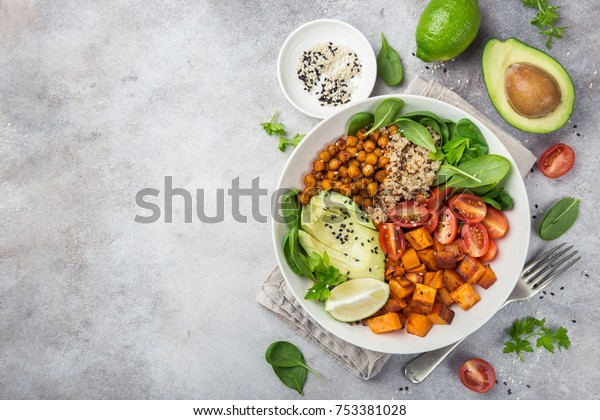

In [145]:
read_image_from_url(url)

In [151]:

txt = "Corn nuts. Lima beans and corn, cooked, fat added. Seven-layer salad, lettuce salad made with a combination of onion, celery, green pepper, peas, mayonnaise, cheese, eggs, and/or bacon "
inputs = tokenizer([txt], max_length=1024, return_tensors="pt")["input_ids"]
# img = read_image_from_url(url)
# patch_img = patch_resize_transform(img).unsqueeze(0)

gen = model.generate(inputs, num_beams=6) #, patch_images=patch_img
r = tokenizer.batch_decode(gen, skip_special_tokens=True)

r

[' lima beans and lima beans and corn, cooked, fat added lima beans and']

In [138]:
model.generate??

Signature:
model.generate(
    inputs: Optional[torch.Tensor] = None,
    max_length: Optional[int] = None,
    min_length: Optional[int] = None,
    do_sample: Optional[bool] = None,
    early_stopping: Optional[bool] = None,
    num_beams: Optional[int] = None,
    temperature: Optional[float] = None,
    top_k: Optional[int] = None,
    top_p: Optional[float] = None,
    typical_p: Optional[float] = None,
    repetition_penalty: Optional[float] = None,
    bad_words_ids: Optional[Iterable[int]] = None,
    force_words_ids: Union[Iterable[int], Iterable[Iterable[int]], NoneType] = None,
    bos_token_id: Optional[int] = None,
    pad_token_id: Optional[int] = None,
    eos_token_id: Optional[int] = None,
    length_penalty: Optional[float] = None,
    no_repeat_ngram_size: Optional[int] = None,
    encoder_no_repeat_ngram_size: Optional[int] = None,
    num_return_sequences: Optional[int] = None,
    max_time: Optional[float] = None,
    max_new_tokens: Optional[int] = None,
    deco

In [136]:
patch_img.shape

torch.Size([1, 3, 512, 512])

In [134]:
inputs

tensor([[    0, 12196,    16,    15,     5,  1345, 28749,     2]])

In [87]:
model.generate?

Signature:
model.generate(
    inputs: Optional[torch.Tensor] = None,
    max_length: Optional[int] = None,
    min_length: Optional[int] = None,
    do_sample: Optional[bool] = None,
    early_stopping: Optional[bool] = None,
    num_beams: Optional[int] = None,
    temperature: Optional[float] = None,
    top_k: Optional[int] = None,
    top_p: Optional[float] = None,
    typical_p: Optional[float] = None,
    repetition_penalty: Optional[float] = None,
    bad_words_ids: Optional[Iterable[int]] = None,
    force_words_ids: Union[Iterable[int], Iterable[Iterable[int]], NoneType] = None,
    bos_token_id: Optional[int] = None,
    pad_token_id: Optional[int] = None,
    eos_token_id: Optional[int] = None,
    length_penalty: Optional[float] = None,
    no_repeat_ngram_size: Optional[int] = None,
    encoder_no_repeat_ngram_size: Optional[int] = None,
    num_return_sequences: Optional[int] = None,
    max_time: Optional[float] = None,
    max_new_tokens: Optional[int] = None,
    deco